**Используя kmeans сделать кластеризацию футбольных команд по стоимости и количеству проигрышей, результат отобразить в виде точечного графика для случая из 3 и из 5 кластеров. Если стоимость команд не указана, то сгенерировать случайные стоимости для команд.**

C:\Users\artam\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


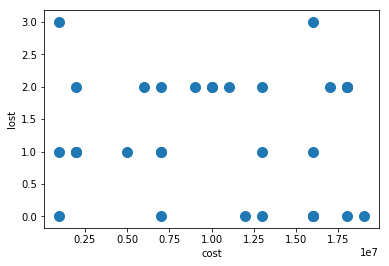

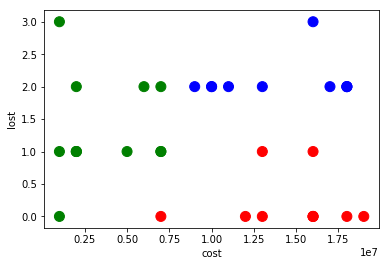

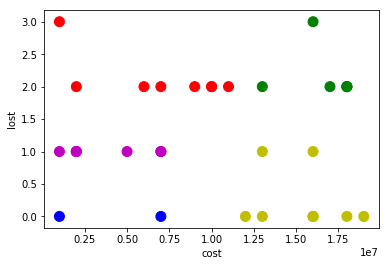

In [36]:
import requests
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten, kmeans2
%matplotlib inline

# 2000 ЧМ по футболу 2018
# 2001 ЛЧ УЕФА
comp_id = 2000

#token = '6343e2401b274e4b9d3233b7291115e5'
my_token = '0000c4fdd1db4759ba648b7e4eec12c1'

def get_competition(comp_id):
    comp_uri = 'http://api.football-data.org/v2/competitions/{}/standings'.format(comp_id)
    
    json = {}
    try:
        json = requests.get(comp_uri, headers = { 'X-Auth-Token': my_token}).json()
        return json['standings']
    except:
        print(json)
        return None

standings = get_competition(comp_id)

teams =[]
for i in range(0,len(standings)):
    for j in range(0,len(standings[i]['table'])):
        if standings[i]['table'][j]['playedGames']:
            teams.append({'name':standings[i]['table'][j]['team']['name'],'lost':standings[i]['table'][j]['lost'],'cost':random.randint(1,20)*10**6})


teams_pd = pd.DataFrame(teams)

teams_pd.plot.scatter(x='cost', y='lost', s=100)
del teams_pd['name']

whitened = whiten(teams_pd.as_matrix())
centroids3, cluster_map3 = kmeans2(whitened, 3)



colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map3]

teams_pd.plot.scatter(x='cost', y='lost', c=colors, s=100)

centroids5, cluster_map5 = kmeans2(whitened, 5)
colors = [colors_map[c] for c in cluster_map5]
teams_pd.plot.scatter(x='cost', y='lost', c=colors, s=100)
